# Basic data exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
s=pd.read_csv("may-jan.csv")

c:\Users\aksha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
s.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'Grid Power Factor',
       'Inverter Temperature(℃)', 'Inverter Status',
       'Generation Yesterday(kWh)', 'System Time'],
      dtype='object')

In [4]:
s['Inverter Status'].value_counts()

1022       32241
1022        5683
1025         499
1025         112
Standby       28
Name: Inverter Status, dtype: int64

In [5]:
x=s.columns
l=[]
for i in range(1,len(x)-1):
    l.append(s[x[i]].value_counts())
for i in l:
    print(i)

200.1    225
200.0    192
632.1    181
636.0    180
640.1    180
        ... 
137.8      1
385.5      1
433.6      1
124.4      1
179.5      1
Name: DC Voltage PV1(V), Length: 3442, dtype: int64
200.1    191
200.0    171
616.1    149
620.0    120
624.2    119
        ... 
184.2      1
410.5      1
348.0      1
214.5      1
422.0      1
Name: DC Voltage PV2(V), Length: 3364, dtype: int64
200.1    253
200.0    253
636.1    183
620.0    181
628.1    174
        ... 
430.9      1
311.5      1
142.4      1
162.1      1
170.8      1
Name: DC Voltage PV3(V), Length: 3508, dtype: int64
200.0    256
200.1    219
672.1    218
672.0    210
671.9    207
        ... 
135.2      1
385.9      1
472.1      1
122.8      1
174.0      1
Name: DC Voltage PV4(V), Length: 3478, dtype: int64
0.1     3130
0.2     1467
0.3     1321
0.4     1070
0.5      942
        ... 
10.5       2
10.3       1
11.6       1
10.1       1
10.8       1
Name: DC Current1(A), Length: 109, dtype: int64
0.1     2029
0.2      985
0.3

Conclusion:Alert details, Alert code, Grid power factor, Inverter status attributes doesnt have much unique values

# Converting to datetime

In [6]:
def obj_to_DT(s,x):
    s.loc[:,x] = s[x].astype('string')
    s[x]= pd.to_datetime(s[x],dayfirst=True)
    return s

In [7]:
s=obj_to_DT(s,'Time')
s.dtypes

Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [8]:
s.head(10)

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
5,2022-05-02 06:22:00,268.1,603.6,267.8,252.1,0.2,0.4,0.2,0.2,399,...,50.05,3164,0.1,117029,240,1,35.4,1022,126.9,22-05-2002 06:43
6,2022-05-02 06:27:00,548.0,611.8,523.9,452.3,0.3,0.5,0.3,0.3,763,...,50.03,3164,0.1,117029,480,1,35.7,1022,126.9,22-05-2002 06:48
7,2022-05-02 06:33:00,616.0,624.0,632.1,664.1,0.3,0.6,0.3,0.3,948,...,49.99,3164,0.1,117029,710,1,36.1,1022,126.9,22-05-2002 06:54
8,2022-05-02 06:38:00,628.1,628.0,628.3,660.0,0.4,0.8,0.4,0.4,1268,...,50.06,3164,0.2,117029,1080,1,36.5,1022,126.9,22-05-2002 06:59
9,2022-05-02 06:43:00,627.8,635.3,628.1,667.7,0.6,1.0,0.6,0.5,1722,...,50.01,3164,0.3,117029,1530,1,36.8,1022,126.9,22-05-2002 07:04


# Outlier analysis and removal

In [9]:
from datetime import date

In [10]:
dates=s
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t

2022-06-07    174
2022-06-14    169
2022-06-08    168
2022-08-03    165
2022-06-05    163
             ... 
2022-11-28    102
2022-06-29     82
2022-11-27     31
2022-10-05     19
2022-10-06      5
Name: Time, Length: 273, dtype: int64

In [11]:
# ouliers dates
date_outliers=t.index[-4:]
print(date_outliers)

Index([2022-06-29, 2022-11-27, 2022-10-05, 2022-10-06], dtype='object')


In [12]:
import matplotlib.pyplot as plt
t.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
outliersN=pd.read_csv("outliers3.csv") # outliers removed using excel
outliersN

c:\Users\aksha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,02-05-2022 05:55,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,02-05-2022 06:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,02-05-2022 06:05,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,02-05-2022 06:12,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,02-05-2022 06:17,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,31-01-2023 18:08,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,31-01-2023 18:14,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,31-01-2023 18:19,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,31-01-2023 18:24,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [14]:
from datetime import time,date
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)#converted time to string
outliersN.dtypes

Time                                      datetime64[ns]
DC Voltage PV1(V)                                float64
DC Voltage PV2(V)                                float64
DC Voltage PV3(V)                                float64
DC Voltage PV4(V)                                float64
DC Current1(A)                                   float64
DC Current2(A)                                   float64
DC Current3(A)                                   float64
DC Current4(A)                                   float64
Total DC Input Power(W)                            int64
AC Voltage R/U/A(V)                              float64
AC Voltage S/V/B(V)                              float64
AC Voltage T/W/C(V)                              float64
AC Current R/U/A(A)                              float64
AC Current S/V/B(A)                              float64
AC Current T/W/C(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)      

In [15]:
import datetime
outliersN['Time']= pd.to_datetime(outliersN['Time'],dayfirst=True)
outliersN

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),DC Current1(A),DC Current2(A),DC Current3(A),DC Current4(A),Total DC Input Power(W),...,AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),Daily Generation (Active)(kWh),Total Generation (Active)(kWh),Power Grid Total Apparent Power(VA),Grid Power Factor,Inverter Temperature(℃),Inverter Status,Generation Yesterday(kWh),System Time
0,2022-05-02 05:55:00,92.2,165.4,94.8,86.5,0.1,0.1,0.1,0.1,43,...,50.00,3164,0.0,117029,80,1,32.9,1022,126.9,22-05-2002 06:16
1,2022-05-02 06:00:00,200.1,236.2,200.1,536.4,0.1,0.2,0.1,0.1,140,...,50.10,3164,0.0,117029,20,1,34.1,1022,126.9,22-05-2002 06:21
2,2022-05-02 06:05:00,207.8,344.2,216.1,536.4,0.1,0.2,0.1,0.1,164,...,50.11,3164,0.0,117029,30,1,34.4,1022,126.9,22-05-2002 06:26
3,2022-05-02 06:12:00,228.1,596.1,228.0,536.3,0.2,0.3,0.2,0.2,377,...,50.01,3164,0.0,117029,190,1,34.9,1022,126.9,22-05-2002 06:33
4,2022-05-02 06:17:00,240.1,608.1,240.1,536.6,0.2,0.3,0.2,0.2,385,...,50.06,3164,0.0,117029,160,1,35.3,1022,126.9,22-05-2002 06:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,2023-01-31 18:08:00,473.3,200.1,484.5,515.6,0.1,0.1,0.1,0.1,167,...,49.94,2975,100.0,145847,90,1,36.8,1022,90.6,23-01-1931 18:13
38504,2023-01-31 18:14:00,473.9,200.1,484.9,516.3,0.1,0.1,0.1,0.1,167,...,49.88,2975,100.0,145847,100,1,36.5,1022,90.6,23-01-1931 18:17
38505,2023-01-31 18:19:00,473.8,457.3,445.2,475.6,0.1,0.1,0.1,0.1,185,...,50.05,2975,100.0,145847,70,1,36.3,1022,90.6,23-01-1931 18:23
38506,2023-01-31 18:24:00,384.7,422.0,370.5,382.3,0.1,0.1,0.1,0.1,155,...,49.97,2975,100.0,145847,70,1,36.0,1022,90.6,23-01-1931 18:28


In [16]:
outliersN=outliersN[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)', 'AC Voltage T/W/C(V)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)',
       'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)']]

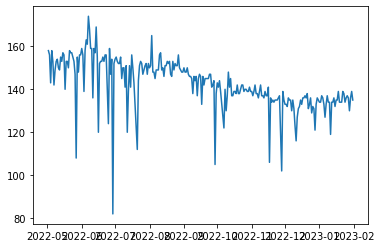

In [17]:
dates=outliersN
t=dates['Time'].apply(lambda x: x.date()).value_counts()# checking outliers
t.plot()
plt.show()

# Converting to 1 HR intervals

In [18]:
outliersN.set_index('Time',inplace= True)
print(outliersN)

                     DC Voltage PV1(V)  DC Voltage PV2(V)  DC Voltage PV3(V)  \
Time                                                                           
2022-05-02 05:55:00               92.2              165.4               94.8   
2022-05-02 06:00:00              200.1              236.2              200.1   
2022-05-02 06:05:00              207.8              344.2              216.1   
2022-05-02 06:12:00              228.1              596.1              228.0   
2022-05-02 06:17:00              240.1              608.1              240.1   
...                                ...                ...                ...   
2023-01-31 18:08:00              473.3              200.1              484.5   
2023-01-31 18:14:00              473.9              200.1              484.9   
2023-01-31 18:19:00              473.8              457.3              445.2   
2023-01-31 18:24:00              384.7              422.0              370.5   
2023-01-31 18:30:00              179.5  

In [19]:

df1=outliersN[['DC Voltage PV1(V)','DC Voltage PV2(V)','DC Voltage PV3(V)',
'DC Voltage PV4(V)','AC Voltage R/U/A(V)','AC Voltage S/V/B(V)',
'AC Voltage T/W/C(V)','AC Output Frequency R(Hz)','Generation of Last Month (Active)(kWh)',
'Inverter Temperature(℃)','Generation Yesterday(kWh)']]
df1=df1.resample("H").mean()

df2=outliersN[['DC Current1(A)','DC Current2(A)','DC Current3(A)',
'DC Current4(A)','Total DC Input Power(W)','AC Current R/U/A(A)',
'AC Current S/V/B(A)','AC Current T/W/C(A)',
'AC Output Total Power (Active)(W)','Power Grid Total Apparent Power(VA)']]
df2=df2.resample("H").sum()
print(df2)

df3=outliersN[['Total Generation (Active)(kWh)','Daily Generation (Active)(kWh)']]
df3=df3.resample("H").max()
print(df3)

                     DC Current1(A)  DC Current2(A)  DC Current3(A)  \
Time                                                                  
2022-05-02 05:00:00             0.1             0.1             0.1   
2022-05-02 06:00:00             5.0             8.8             4.9   
2022-05-02 07:00:00            18.2            30.6            17.5   
2022-05-02 08:00:00            39.6            76.5            39.7   
2022-05-02 09:00:00            52.4           102.9            52.3   
...                             ...             ...             ...   
2023-01-31 14:00:00            45.0            85.4            43.8   
2023-01-31 15:00:00            32.3            60.6            31.6   
2023-01-31 16:00:00            11.5            21.7            11.4   
2023-01-31 17:00:00             4.1             7.9             4.0   
2023-01-31 18:00:00             0.6             0.6             0.6   

                     DC Current4(A)  Total DC Input Power(W)  \
Time        

In [20]:
df1=df1.reset_index()
df2=df2.reset_index()
df3=df3.reset_index()
df1=pd.merge(df1,df2,on='Time')
df1=pd.merge(df1,df3,on='Time')
df1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [21]:
df1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [22]:
#times['actual time']=times['Time'].apply(lambda x: x.time())
#times[times['actual time']==time(6,00,00)]

# Common time interval(6-7)

In [23]:
from datetime import time
solar=df1[df1['Time'].apply(lambda x: x.time()) < time(19,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
0,2022-05-02 05:00:00,92.200000,165.400000,94.800000,86.500000,236.800000,236.200000,236.200000,50.000000,3164.0,...,0.1,0.1,43,0.0,0.0,0.0,20,80,117029.0,0.0
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


In [24]:
solar=solar[solar['Time'].apply(lambda x: x.time()) >= time(6,00,00)]
solar

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,DC Current3(A),DC Current4(A),Total DC Input Power(W),AC Current R/U/A(A),AC Current S/V/B(A),AC Current T/W/C(A),AC Output Total Power (Active)(W),Power Grid Total Apparent Power(VA),Total Generation (Active)(kWh),Daily Generation (Active)(kWh)
1,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,4.9,4.9,14059,18.8,18.2,18.2,11690,11600,117030.0,0.9
2,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,17.5,17.4,53554,73.3,72.3,72.0,51290,51150,117034.0,5.3
3,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,39.7,39.0,122764,166.6,166.1,166.4,118640,118680,117044.0,15.3
4,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,52.3,51.8,158973,218.5,219.0,217.2,153770,153660,117058.0,28.7
5,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,...,48.6,48.0,148295,208.2,208.3,207.9,143220,143170,117071.0,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,43.8,43.1,137389,190.9,189.8,190.1,132460,132330,145835.0,87.9
6586,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,31.6,31.0,99259,140.1,139.5,140.3,95430,95320,145843.0,95.9
6587,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,11.4,11.2,35764,50.7,49.9,51.7,33550,33440,145846.0,99.0
6588,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,4.0,3.8,12401,18.8,17.9,19.2,10260,10090,145847.0,100.0


# Removing few columns in weather dataset

In [25]:
w=pd.read_csv("weather_data_may_to_jan.csv")
w=w.rename(columns = {'datetime':'Time'})

In [26]:
w1=w[['Time','temp','dew','humidity','precip','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','uvindex']]
print(w1)

                     Time  temp   dew  humidity  precip  windgust  windspeed  \
0     2022-05-01T00:00:00  29.5  15.0     41.31     0.0      24.5        8.5   
1     2022-05-01T01:00:00  29.0  15.0     42.56     0.0      29.5        8.5   
2     2022-05-01T02:00:00  27.5  18.2     56.82     0.0      30.6        1.1   
3     2022-05-01T03:00:00  27.0  16.0     50.99     0.0      26.3        8.4   
4     2022-05-01T04:00:00  28.0  17.0     51.25     0.0      23.8       11.2   
...                   ...   ...   ...       ...     ...       ...        ...   
6619  2023-01-31T19:00:00  24.9  15.1     54.81     0.0      14.4        4.4   
6620  2023-01-31T20:00:00  24.9  15.1     54.27     0.0      14.8        4.3   
6621  2023-01-31T21:00:00  23.0  15.1     61.27     0.0      14.0        1.4   
6622  2023-01-31T22:00:00  21.9  15.2     65.69     0.0      16.2        1.4   
6623  2023-01-31T23:00:00  21.6  15.7     69.00     0.0      14.4        1.2   

      winddir  sealevelpressure  cloudc

In [27]:
w1['Time']= pd.to_datetime(w1['Time'])#converted time to string
w1['Time']= pd.to_datetime(w1['Time'])
w1.dtypes

c:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\Users\aksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Time                datetime64[ns]
temp                       float64
dew                        float64
humidity                   float64
precip                     float64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation               int64
uvindex                      int64
dtype: object

# Merging weather and solar data

In [28]:
weather=w1

In [29]:
d1=pd.merge(solar,weather, on='Time')
print(d1)

                    Time  DC Voltage PV1(V)  DC Voltage PV2(V)  \
0    2022-05-02 06:00:00         455.016667         568.625000   
1    2022-05-02 07:00:00         637.527273         645.463636   
2    2022-05-02 08:00:00         625.583333         625.608333   
3    2022-05-02 09:00:00         604.027273         608.400000   
4    2022-05-02 10:00:00         605.054545         608.690909   
...                  ...                ...                ...   
3570 2023-01-31 14:00:00         619.200000         629.966667   
3571 2023-01-31 15:00:00         629.083333         632.408333   
3572 2023-01-31 16:00:00         640.845455         635.318182   
3573 2023-01-31 17:00:00         615.708333         617.041667   
3574 2023-01-31 18:00:00         364.233333         341.500000   

      DC Voltage PV3(V)  DC Voltage PV4(V)  AC Voltage R/U/A(V)  \
0            455.058333         572.833333           235.258333   
1            608.336364         672.427273           234.718182   
2     

In [30]:
d1

,Time,DC Voltage PV1(V),DC Voltage PV2(V),DC Voltage PV3(V),DC Voltage PV4(V),AC Voltage R/U/A(V),AC Voltage S/V/B(V),AC Voltage T/W/C(V),AC Output Frequency R(Hz),Generation of Last Month (Active)(kWh),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,2022-05-02 06:00:00,455.016667,568.625000,455.058333,572.833333,235.258333,236.941667,236.116667,50.042500,3164.0,...,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,2022-05-02 07:00:00,637.527273,645.463636,608.336364,672.427273,234.718182,236.281818,236.018182,50.061818,3164.0,...,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2022-05-02 08:00:00,625.583333,625.608333,621.641667,661.633333,236.733333,237.800000,236.566667,50.080000,3164.0,...,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,2022-05-02 09:00:00,604.027273,608.400000,606.981818,639.736364,233.936364,233.100000,233.563636,50.028182,3164.0,...,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,2022-05-02 10:00:00,605.054545,608.690909,608.763636,642.200000,229.172727,228.072727,227.809091,49.974545,3164.0,...,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,2023-01-31 14:00:00,619.200000,629.966667,624.000000,661.366667,230.491667,232.733333,230.550000,49.996667,2975.0,...,39.18,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9
3571,2023-01-31 15:00:00,629.083333,632.408333,631.075000,668.400000,226.241667,228.550000,225.491667,49.916667,2975.0,...,38.42,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8
3572,2023-01-31 16:00:00,640.845455,635.318182,629.527273,672.436364,227.272727,230.900000,225.063636,49.970000,2975.0,...,38.42,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5
3573,2023-01-31 17:00:00,615.708333,617.041667,585.808333,616.366667,230.983333,236.133333,229.575000,50.040000,2975.0,...,41.95,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2


In [31]:
d1.columns

Index(['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)', 'AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)',
       'Generation Yesterday(kWh)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Total Generation (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'temp', 'dew', 'humidity', 'precip',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'uvindex'],
      dtype='object')

In [32]:
d1=d1[['Time', 'DC Voltage PV1(V)', 'DC Voltage PV2(V)', 'DC Voltage PV3(V)',
       'DC Voltage PV4(V)','AC Voltage R/U/A(V)', 'AC Voltage S/V/B(V)',
       'AC Voltage T/W/C(V)', 'AC Output Frequency R(Hz)',
       'Generation of Last Month (Active)(kWh)', 'Inverter Temperature(℃)', 'DC Current1(A)', 'DC Current2(A)',
       'DC Current3(A)', 'DC Current4(A)', 'Total DC Input Power(W)',
       'AC Current R/U/A(A)', 'AC Current S/V/B(A)', 'AC Current T/W/C(A)',
       'AC Output Total Power (Active)(W)',
       'Power Grid Total Apparent Power(VA)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex']]

In [33]:
d1['DC total voltage (v)']=d1['DC Voltage PV1(V)']+d1['DC Voltage PV2(V)']+d1['DC Voltage PV4(V)']+d1['DC Voltage PV3(V)']

In [34]:
d1['DC total current(A)']=d1['DC Current1(A)']+d1['DC Current2(A)']+d1['DC Current3(A)']+d1['DC Current4(A)']

In [35]:
d1['AC total voltage (v)']=d1['AC Voltage R/U/A(V)']+d1['AC Voltage S/V/B(V)']+d1['AC Voltage T/W/C(V)']

In [36]:
d1['AC total current(A)']=d1['AC Current R/U/A(A)']+d1[ 'AC Current S/V/B(A)']+d1[ 'AC Current T/W/C(A)']

In [37]:
d1=d1[['Time', 'DC total voltage (v)','DC total current(A)',  'Total DC Input Power(W)',
       'AC total voltage (v)','AC total current(A)', 'AC Output Total Power (Active)(W)', 
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)', 'Daily Generation (Active)(kWh)','Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'uvindex','Daily Generation (Active)(kWh)']]

In [38]:
d1

,Time,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),Generation of Last Month (Active)(kWh),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,3164.0,...,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0,0.9
1,2022-05-02 07:00:00,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,3164.0,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
2,2022-05-02 08:00:00,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,3164.0,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
3,2022-05-02 09:00:00,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,3164.0,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
4,2022-05-02 10:00:00,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,3164.0,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,2023-01-31 14:00:00,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,2975.0,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3571,2023-01-31 15:00:00,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,2975.0,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3572,2023-01-31 16:00:00,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,2975.0,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3573,2023-01-31 17:00:00,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,2975.0,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [39]:
d1.feature_names=['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex']

c:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [40]:
d1.target = d1["Daily Generation (Active)(kWh)"] 

c:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [41]:
d1.columns

Index(['Time', 'DC total voltage (v)', 'DC total current(A)',
       'Total DC Input Power(W)', 'AC total voltage (v)',
       'AC total current(A)', 'AC Output Total Power (Active)(W)',
       'AC Output Frequency R(Hz)', 'Inverter Temperature(℃)',
       'Generation of Last Month (Active)(kWh)',
       'Daily Generation (Active)(kWh)', 'Total Generation (Active)(kWh)',
       'Power Grid Total Apparent Power(VA)', 'temp', 'dew', 'humidity',
       'precip', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

In [42]:
d1.dtypes

Time                                      datetime64[ns]
DC total voltage (v)                             float64
DC total current(A)                              float64
Total DC Input Power(W)                            int64
AC total voltage (v)                             float64
AC total current(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)                        float64
Inverter Temperature(℃)                          float64
Generation of Last Month (Active)(kWh)           float64
Daily Generation (Active)(kWh)                   float64
Total Generation (Active)(kWh)                   float64
Power Grid Total Apparent Power(VA)                int64
temp                                             float64
dew                                              float64
humidity                                         float64
precip                                           float64
windgust                       

In [43]:
d1.insert(1,'Date',d1['Time'].apply(lambda x: x.date()))
d1

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,2022-05-02 06:00:00,2022-05-02,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,...,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0,0.9
1,2022-05-02 07:00:00,2022-05-02,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
2,2022-05-02 08:00:00,2022-05-02,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
3,2022-05-02 09:00:00,2022-05-02,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
4,2022-05-02 10:00:00,2022-05-02,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,2023-01-31 14:00:00,2023-01-31,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3571,2023-01-31 15:00:00,2023-01-31,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3572,2023-01-31 16:00:00,2023-01-31,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3573,2023-01-31 17:00:00,2023-01-31,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [44]:
d1.dtypes

Time                                      datetime64[ns]
Date                                              object
DC total voltage (v)                             float64
DC total current(A)                              float64
Total DC Input Power(W)                            int64
AC total voltage (v)                             float64
AC total current(A)                              float64
AC Output Total Power (Active)(W)                  int64
AC Output Frequency R(Hz)                        float64
Inverter Temperature(℃)                          float64
Generation of Last Month (Active)(kWh)           float64
Daily Generation (Active)(kWh)                   float64
Total Generation (Active)(kWh)                   float64
Power Grid Total Apparent Power(VA)                int64
temp                                             float64
dew                                              float64
humidity                                         float64
precip                         

In [45]:
d1['Time']=d1['Time'].apply(lambda x: x.time())
d1

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,Daily Generation (Active)(kWh)
0,06:00:00,2022-05-02,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,...,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0,0.9
1,07:00:00,2022-05-02,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0,5.3
2,08:00:00,2022-05-02,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2,15.3
3,09:00:00,2022-05-02,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5,28.7
4,10:00:00,2022-05-02,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,14:00:00,2023-01-31,2534.533333,217.3,137389,693.775000,570.8,132460,49.996667,50.758333,...,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,9,87.9
3571,15:00:00,2023-01-31,2560.966667,155.5,99259,680.283333,419.9,95430,49.916667,46.908333,...,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,8,95.9
3572,16:00:00,2023-01-31,2578.127273,55.8,35764,683.236364,152.3,33550,49.970000,42.418182,...,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,5,99.0
3573,17:00:00,2023-01-31,2434.925000,19.8,12401,696.691667,55.9,10260,50.040000,38.608333,...,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,2,100.0


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
d1['Time']= label_encoder.fit_transform(d1['Time'])

In [47]:
d1=obj_to_DT(d1,'Date')

In [48]:
d1['Date']= d1['Date'].apply(lambda x: x.date() - date(year=2022,month=1,day=1))

In [49]:
d1['Date']= d1['Date'].apply(lambda x: str(x))
d1['Date']= d1['Date'].apply(lambda x: int(x[0:3]))

In [50]:
x = d1.drop("Daily Generation (Active)(kWh)",axis=1)   #Feature Matrix
y = d1["Daily Generation (Active)(kWh)"] 

In [51]:
x.head()

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
0,0,121,2051.533333,23.6,14059,708.316667,55.2,11690,50.042500,36.025000,...,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0
1,1,121,2563.754545,83.7,53554,707.018182,217.6,51290,50.061818,41.400000,...,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,0
2,2,121,2534.466667,194.8,122764,711.100000,499.1,118640,50.080000,48.441667,...,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,2
3,3,121,2459.145455,259.4,158973,700.600000,654.7,153770,50.028182,56.872727,...,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,5
4,4,121,2464.709091,241.9,148295,685.054545,624.4,143220,49.974545,57.763636,...,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,6


In [52]:
x.corr()

,Time,Date,DC total voltage (v),DC total current(A),Total DC Input Power(W),AC total voltage (v),AC total current(A),AC Output Total Power (Active)(W),AC Output Frequency R(Hz),Inverter Temperature(℃),...,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,uvindex
Time,1.000000e+00,3.864899e-17,-0.141663,-0.111514,-0.120377,0.042144,-0.120276,-0.120418,0.002919,0.236480,...,-0.384369,0.021083,-0.106166,-0.065097,-0.043603,-0.272987,-0.011452,0.215690,0.332101,0.315083
Date,3.864899e-17,1.000000e+00,-0.116466,-0.008714,0.000507,0.086475,-0.011697,0.001833,-0.001348,-0.234046,...,-0.262545,-0.045942,-0.385367,-0.065523,-0.532565,0.780123,-0.443364,-0.119581,0.025490,0.019013
DC total voltage (v),-1.416633e-01,-1.164663e-01,1.000000,0.326296,0.345894,-0.045113,0.350209,0.344882,-0.080952,0.302468,...,-0.060995,-0.009481,0.089382,0.000238,0.113806,-0.088133,0.094423,0.026281,0.254329,0.269991
DC total current(A),-1.115136e-01,-8.714354e-03,0.326296,1.000000,0.998966,0.149491,0.997651,0.998845,0.051953,0.862792,...,-0.374242,-0.045493,-0.139047,0.057150,0.017130,0.136089,-0.292590,0.206775,0.667495,0.670170
Total DC Input Power(W),-1.203773e-01,5.068224e-04,0.345894,0.998966,1.000000,0.151469,0.998703,0.999979,0.053548,0.853633,...,-0.366329,-0.046128,-0.130490,0.062652,0.015326,0.143500,-0.285720,0.200763,0.660461,0.663462
AC total voltage (v),4.214436e-02,8.647524e-02,-0.045113,0.149491,0.151469,1.000000,0.131177,0.151357,0.859404,0.081965,...,-0.026687,0.005093,0.028600,0.069260,-0.013776,0.018608,-0.056379,0.013979,0.040404,0.037332
AC total current(A),-1.202757e-01,-1.169719e-02,0.350209,0.997651,0.998703,0.131177,1.000000,0.998619,0.053299,0.858772,...,-0.363549,-0.046409,-0.128974,0.059123,0.021505,0.136475,-0.278373,0.201767,0.660575,0.663745
AC Output Total Power (Active)(W),-1.204183e-01,1.832577e-03,0.344882,0.998845,0.999979,0.151357,0.998619,1.000000,0.052767,0.853041,...,-0.366294,-0.046440,-0.130432,0.063084,0.014884,0.144592,-0.286201,0.200559,0.660371,0.663290
AC Output Frequency R(Hz),2.919079e-03,-1.347948e-03,-0.080952,0.051953,0.053548,0.859404,0.053299,0.052767,1.000000,0.042329,...,0.035305,0.005587,0.019145,0.010977,0.002744,-0.000945,0.026650,-0.013086,-0.032039,-0.033856
Inverter Temperature(℃),2.364801e-01,-2.340462e-01,0.302468,0.862792,0.853633,0.081965,0.858772,0.853041,0.042329,1.000000,...,-0.531333,-0.051077,-0.208554,-0.031227,0.079034,-0.118015,-0.252565,0.327085,0.801182,0.799274


c:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


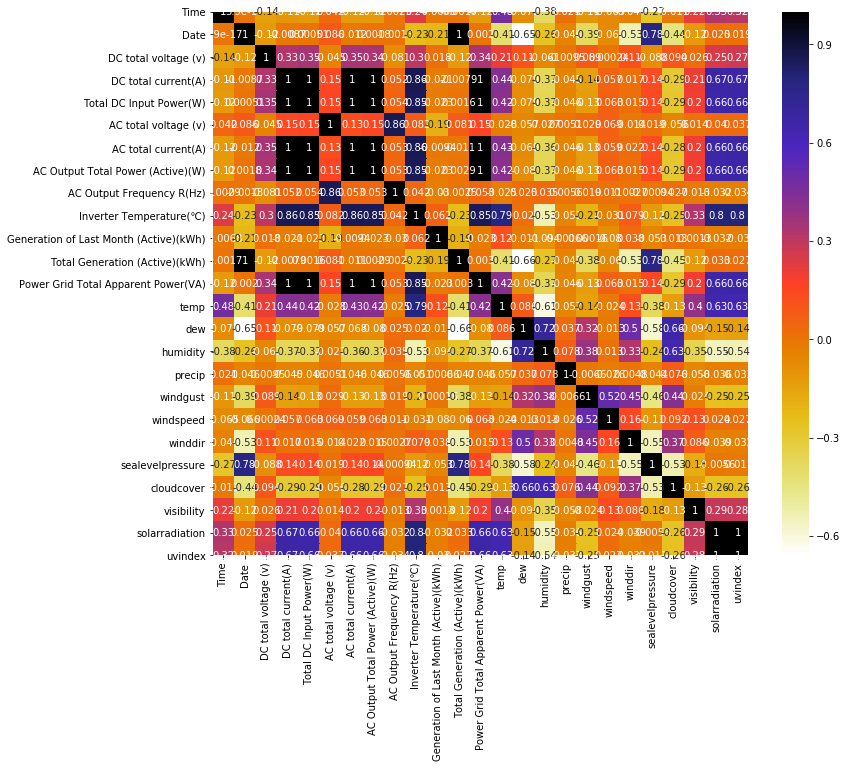

In [53]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [55]:
corr_features = correlation(x, 0.85)
len(set(corr_features))

8

In [56]:
corr_features

{'AC Output Frequency R(Hz)',
 'AC Output Total Power (Active)(W)',
 'AC total current(A)',
 'Inverter Temperature(℃)',
 'Power Grid Total Apparent Power(VA)',
 'Total DC Input Power(W)',
 'Total Generation (Active)(kWh)',
 'uvindex'}

In [57]:
d2=x.drop(corr_features,axis=1)

In [58]:
d2

,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),Generation of Last Month (Active)(kWh),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation
0,0,121,2051.533333,23.6,708.316667,3164.0,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0
1,1,121,2563.754545,83.7,707.018182,3164.0,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22
2,2,121,2534.466667,194.8,711.100000,3164.0,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159
3,3,121,2459.145455,259.4,700.600000,3164.0,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457
4,4,121,2464.709091,241.9,685.054545,3164.0,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,8,395,2534.533333,217.3,693.775000,2975.0,29.3,14.0,39.18,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856
3571,9,395,2560.966667,155.5,680.283333,2975.0,28.9,13.3,38.42,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772
3572,10,395,2578.127273,55.8,683.236364,2975.0,28.9,13.3,38.42,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484
3573,11,395,2434.925000,19.8,696.691667,2975.0,28.3,14.2,41.95,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209


In [59]:
d2.columns

Index(['Time', 'Date', 'DC total voltage (v)', 'DC total current(A)',
       'AC total voltage (v)', 'Generation of Last Month (Active)(kWh)',
       'temp', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation'],
      dtype='object')

In [60]:
d= d1.iloc[:,-1:]
d

,Daily Generation (Active)(kWh)
0,0.9
1,5.3
2,15.3
3,28.7
4,41.5
...,...
3570,87.9
3571,95.9
3572,99.0
3573,100.0


In [61]:
d2=d2.join(d)

In [62]:
d2.drop('Generation of Last Month (Active)(kWh)',axis=1,inplace=True)

In [63]:
d2.to_csv('finalData.csv')

In [64]:
final=pd.read_csv("finalData.csv")
final.isnull().sum()

Unnamed: 0                          0
Time                                0
Date                                0
DC total voltage (v)              106
DC total current(A)                 0
AC total voltage (v)              106
temp                                0
dew                                 0
humidity                            0
precip                              0
windgust                            0
windspeed                           0
winddir                             0
sealevelpressure                    0
cloudcover                          0
visibility                          0
solarradiation                      0
Daily Generation (Active)(kWh)    106
dtype: int64

In [65]:
final[final['Daily Generation (Active)(kWh)'].isna()]

,Unnamed: 0,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
325,325,0,146,NaN,0.0,NaN,26.0,18.0,61.39,0.0,33.5,13.0,265.0,1011.0,89.0,5.0,0,NaN
326,326,1,146,NaN,0.0,NaN,25.1,20.6,75.75,0.0,34.9,3.0,329.0,1011.0,55.7,5.0,3,NaN
327,327,2,146,NaN,0.0,NaN,27.8,20.3,63.58,0.0,33.8,6.9,268.0,1009.2,57.6,5.1,12,NaN
328,328,3,146,NaN,0.0,NaN,29.1,21.9,65.42,0.0,31.0,10.7,289.0,1012.0,50.0,6.0,94,NaN
595,595,10,166,NaN,0.0,NaN,28.4,23.1,72.75,0.0,9.4,5.8,270.0,1006.8,50.0,6.0,110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2911,12,344,NaN,0.0,NaN,21.9,20.0,89.23,0.0,25.2,4.4,90.0,1013.8,100.0,4.7,35,NaN
2937,2937,12,346,NaN,0.0,NaN,22.9,19.9,83.21,0.0,18.7,5.0,90.0,1016.0,98.4,5.0,16,NaN
3119,3119,12,360,NaN,0.0,NaN,26.9,18.9,61.58,0.0,17.3,9.4,100.0,1017.0,27.7,6.0,95,NaN
3132,3132,12,361,NaN,0.0,NaN,26.1,17.0,57.14,0.0,8.6,5.7,47.0,1018.0,30.9,5.9,123,NaN


In [66]:
final.dropna(inplace=True)

In [67]:
final

,Unnamed: 0,Time,Date,DC total voltage (v),DC total current(A),AC total voltage (v),temp,dew,humidity,precip,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,Daily Generation (Active)(kWh)
0,0,0,121,2051.533333,23.6,708.316667,29.0,19.0,54.83,0.0,22.3,15.6,220.0,1009.0,50.0,5.0,0,0.9
1,1,1,121,2563.754545,83.7,707.018182,29.0,20.9,61.51,0.0,18.7,9.3,256.0,1010.0,83.4,5.9,22,5.3
2,2,2,121,2534.466667,194.8,711.100000,30.7,20.8,55.32,0.0,16.2,9.1,265.0,1007.1,60.3,7.9,159,15.3
3,3,3,121,2459.145455,259.4,700.600000,32.1,19.3,46.84,0.0,17.3,10.4,285.0,1011.0,83.4,6.0,457,28.7
4,4,4,121,2464.709091,241.9,685.054545,33.1,18.2,41.40,0.0,19.4,8.0,270.0,1010.0,50.0,6.0,607,41.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,3570,8,395,2534.533333,217.3,693.775000,29.3,14.0,39.18,0.0,12.6,11.3,82.0,1011.8,58.6,7.3,856,87.9
3571,3571,9,395,2560.966667,155.5,680.283333,28.9,13.3,38.42,0.0,11.2,13.4,86.0,1013.2,30.9,5.0,772,95.9
3572,3572,10,395,2578.127273,55.8,683.236364,28.9,13.3,38.42,0.0,11.5,11.7,71.0,1013.2,30.9,5.0,484,99.0
3573,3573,11,395,2434.925000,19.8,696.691667,28.3,14.2,41.95,0.0,13.0,1.8,81.0,1011.7,68.5,7.3,209,100.0


In [68]:
final.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
final.isnull().sum()

Time                              0
Date                              0
DC total voltage (v)              0
DC total current(A)               0
AC total voltage (v)              0
temp                              0
dew                               0
humidity                          0
precip                            0
windgust                          0
windspeed                         0
winddir                           0
sealevelpressure                  0
cloudcover                        0
visibility                        0
solarradiation                    0
Daily Generation (Active)(kWh)    0
dtype: int64

In [70]:
final.rename(columns = {'Date':'no_of_days'}, inplace = True)

In [71]:
X = final.copy()
y = X.pop("Daily Generation (Active)(kWh)")

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [72]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

Time                    1.067075
DC total current(A)     0.780747
solarradiation          0.763298
temp                    0.528658
DC total voltage (v)    0.427087
visibility              0.374210
humidity                0.350768
cloudcover              0.269063
no_of_days              0.235081
dew                     0.222191
sealevelpressure        0.164870
winddir                 0.147997
windspeed               0.122387
windgust                0.096884
AC total voltage (v)    0.021748
precip                  0.000000
Name: MI Scores, dtype: float64

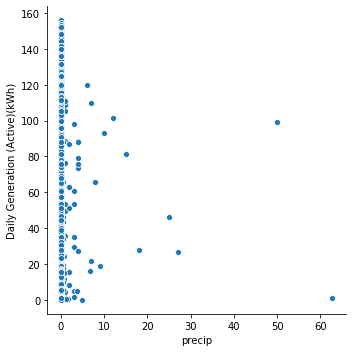

In [73]:
sns.relplot(x="precip", y="Daily Generation (Active)(kWh)", data=final)

From the plot we can see that the precipitation feature is pretty useless

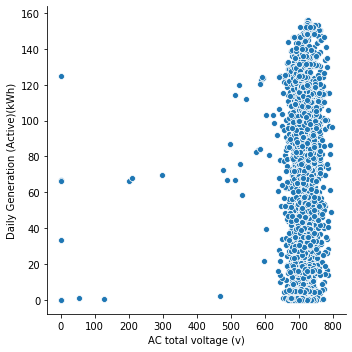

In [74]:
sns.relplot(x="AC total voltage (v)", y="Daily Generation (Active)(kWh)", data=final)

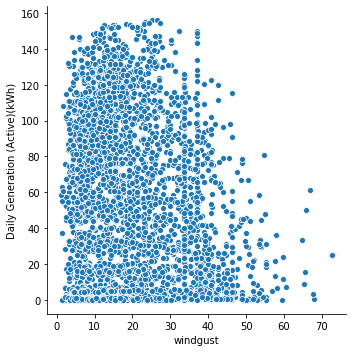

In [75]:
sns.relplot(x="windgust", y="Daily Generation (Active)(kWh)", data=final)

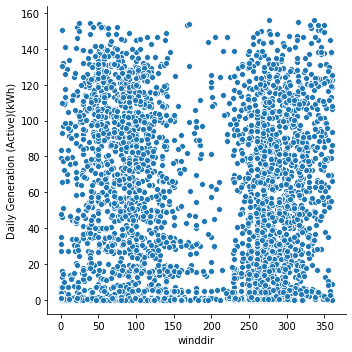

In [76]:
sns.relplot(x="winddir", y="Daily Generation (Active)(kWh)", data=final)

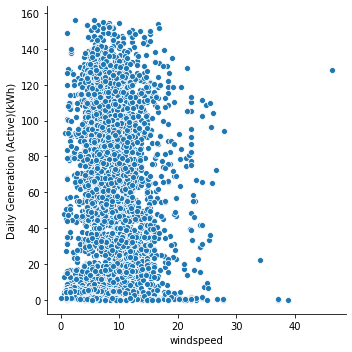

In [77]:
sns.relplot(x="windspeed", y="Daily Generation (Active)(kWh)", data=final)

In [78]:
final.drop(['DC total voltage (v)','DC total current(A)','AC total voltage (v)','windspeed','precip','windgust','no_of_days'],inplace=True,axis=1)

In [79]:
for i in final.columns:
    print(i,": max:",final[i].max()," min:",final[i].min())

Time : max: 12  min: 0
temp : max: 40.1  min: 10.5
dew : max: 26.8  min: -3.8
humidity : max: 100.0  min: 12.25
winddir : max: 360.0  min: 0.0
sealevelpressure : max: 1024.0  min: 998.0
cloudcover : max: 100.0  min: 0.0
visibility : max: 24.1  min: 1.0
solarradiation : max: 1045  min: 0
Daily Generation (Active)(kWh) : max: 155.9  min: 0.0


In [80]:
final.columns

Index(['Time', 'temp', 'dew', 'humidity', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation',
       'Daily Generation (Active)(kWh)'],
      dtype='object')

# Fitting model

In [81]:
X=final.drop('Daily Generation (Active)(kWh)',axis=1)
Y=final['Daily Generation (Active)(kWh)']

In [82]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
X=object.fit_transform(X)

In [83]:
X

array([[-1.60907083,  0.57849007,  0.02382105, ..., -0.16938928,
        -0.32940876, -1.22912032],
       [-1.34036305,  0.57849007,  0.4159463 , ...,  0.85321451,
         0.12239772, -1.16066603],
       [-1.07165527,  0.99708265,  0.39530813, ...,  0.14596458,
         1.12641211, -0.73438252],
       ...,
       [ 1.07800697,  0.55386698, -1.15255468, ..., -0.75417168,
        -0.32940876,  0.27687399],
       [ 1.34671475,  0.40612842, -0.96681115, ...,  0.397023  ,
         0.82520779, -0.5788046 ],
       [ 1.61542253,  0.06140512, -0.78106761, ..., -0.16938928,
        -0.32940876, -1.04553837]])

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=False)

In [85]:
"""x_train.drop(['no_of_days','Time'],inplace=True,axis=1)
x_test.drop(['no_of_days','Time'],inplace=True,axis=1)"""

"x_train.drop(['no_of_days','Time'],inplace=True,axis=1)\nx_test.drop(['no_of_days','Time'],inplace=True,axis=1)"

## Linear regression

In [86]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)
y_predict=l.predict(x_test)

In [87]:
from sklearn.metrics import mean_squared_error
mse_lr=mean_squared_error(y_true=y_test,y_pred=y_predict)
mse_lr

398.9740030380125

In [88]:
import math
rmse_lr=math.sqrt(mse_lr)
rmse_lr

19.974333606856888

In [89]:
from sklearn.metrics import r2_score
r2_lr=r2_score(y_true=y_test,y_pred=y_predict)
print(r2_lr)

0.7837437334496143


In [90]:
x_test.shape

(868, 9)

In [91]:
y_test.shape

(868,)

In [92]:
y_predict.shape

(868,)

In [93]:
x_test

array([[-1.34036305, -0.92351859, -0.12064614, ...,  0.93588008,
        -1.33342315, -1.22912032],
       [-1.07165527, -0.72653385, -0.49213322, ...,  0.5990944 ,
        -1.08241955, -1.0206459 ],
       [-0.80294749, -0.43105673, -0.59532407, ...,  0.00512694,
        -1.13262027, -0.3609955 ],
       ...,
       [ 1.07800697,  0.55386698, -1.15255468, ..., -0.75417168,
        -0.32940876,  0.27687399],
       [ 1.34671475,  0.40612842, -0.96681115, ...,  0.397023  ,
         0.82520779, -0.5788046 ],
       [ 1.61542253,  0.06140512, -0.78106761, ..., -0.16938928,
        -0.32940876, -1.04553837]])

In [94]:
y_test

2679      1.5
2680      6.9
2681     16.3
2682     23.8
2683     30.9
        ...  
3570     87.9
3571     95.9
3572     99.0
3573    100.0
3574    100.0
Name: Daily Generation (Active)(kWh), Length: 868, dtype: float64

## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(x_train,y_train)
y_predict1=dt.predict(x_test)

In [96]:
r2_dt=r2_score(y_true=y_test,y_pred=y_predict1)
print(r2_dt)

0.8238910525105523


In [97]:
mse_dt=mean_squared_error(y_true=y_test,y_pred=y_predict1)
mse_dt

324.90569115741914

# Gradient Boost

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(n_estimators = 200, max_depth = 3, random_state = 1)
gb.fit(x_train,y_train)
y_predict2=gb.predict(x_test)

In [99]:
r2_gb=r2_score(y_true=y_test,y_pred=y_predict2)
print(r2_gb)

0.8065697856902764


In [100]:
mse_gb=mean_squared_error(y_true=y_test,y_pred=y_predict2)
mse_gb

356.86192193496674

# XGBoost

In [101]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb= xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

[21:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [102]:
r2_xgb=r2_score(y_true=y_test,y_pred=pred)
print(r2_xgb)

0.8440644615186794


In [103]:
rmse_xgb = np.sqrt(MSE(y_test, pred))
print(rmse_xgb)

16.961353309995303


# Comparing algorithms

In [104]:
#Accuracy based on R square error
print('Linear regression:',r2_lr*100,'%')
print('Decision Tree:',r2_dt*100,'%')
print('Gradient Boost:',r2_gb*100,'%')
print('XGBoost:',r2_xgb*100,'%')

Linear regression: 78.37437334496144 %
Decision Tree: 82.38910525105523 %
Gradient Boost: 80.65697856902764 %
XGBoost: 84.40644615186794 %


In [105]:
#linear regression
y_fitted_l=l.predict(X)
residual_l=y_fitted_l-Y
corr_l=np.corrcoef(y_fitted_l,Y)
print('correlation coefficient: ',corr_l[0,1])

correlation coefficient:  0.926923826121306


In [106]:
#decision tree
y_fitted_dt=dt.predict(X)
residual_dt=y_fitted_dt-Y
corr_dt=np.corrcoef(y_fitted_dt,Y)
print('correlation coefficient: ',corr_dt[0,1])

correlation coefficient:  0.9298575757982923


In [107]:
#gradient boost
y_fitted_gb=gb.predict(X)
residual_gb=y_fitted_gb-Y
corr_gb=np.corrcoef(y_fitted_gb,Y)
print('correlation coefficient: ',corr_gb[0,1])

correlation coefficient:  0.9671865722431403


In [108]:
#xgboost
y_fitted_xgb=xgb.predict(X)
residual_xgb=y_fitted_xgb-Y
corr_xgb=np.corrcoef(y_fitted_xgb,Y)
print('correlation coefficient: ',corr_xgb[0,1])

correlation coefficient:  0.967374824029347


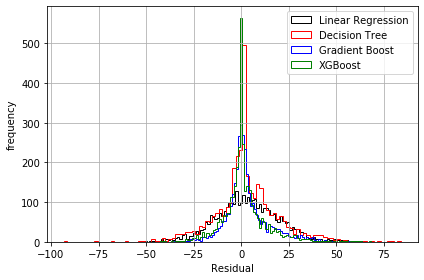

In [109]:
fig, ax = plt.subplots()
ax.hist(residual_l, bins=100, color="black", label='Linear Regression', histtype='step')
ax.hist(residual_dt, bins=100, color="red", label='Decision Tree', histtype='step')
ax.hist(residual_gb, bins=100, color="blue", label='Gradient Boost', histtype='step')
ax.hist(residual_xgb, bins=100, color="green", label='XGBoost', histtype='step')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
fig.tight_layout()
plt.rcParams["figure.figsize"] = [6,4]
plt.show()

# Predicting output

In [110]:
x=final[final['no_of_days']==250]
x_final=x[x['Time']==6]

KeyError: 'no_of_days'

In [ ]:
print(x_final)

      Time  no_of_days  temp   dew  humidity  winddir  sealevelpressure  \
1683     6         250  25.4  23.8     90.56    319.0            1009.0   

      cloudcover  visibility  solarradiation  Daily Generation (Active)(kWh)  
1683        89.1         6.0             837                            53.0  


In [ ]:
tobe=x_final.drop(['Daily Generation (Active)(kWh)'],axis=1)
print(tobe)

      Time  no_of_days  temp   dew  humidity  winddir  sealevelpressure  \
1683     6         250  25.4  23.8     90.56    319.0            1009.0   

      cloudcover  visibility  solarradiation  
1683        89.1         6.0             837  


In [ ]:
y_tobe=xgb.predict(tobe)
print(y_tobe)

[90.55498]
